In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Dataset : Salud del sueño y estilo de vida** 🥱
### Primera parte

1. **Ejercicio 1:**
Realizar un análisis exploratorio del dataset proporcionado a su grupo.
* Identificar la cantidad de variables y observaciones presentes.
* Realizar un resumen estadístico univariado.
* Describir brevemente la naturaleza de los datos.
* Determinar las columnas con valores faltantes.
2. **Ejercicio 2:**
* Seleccionar variables de interés y realizar gráficas que representen conjuntamente varias
columnas en función de algún criterio seleccionado. Justificar la selección de las mismas y
explicar brevemente el resultado obtenido.
3. **Ejercicio 3:**
Realizar un preprocesamiento del conjunto de datos:
* Proponer una estrategia y llevarla adelante para el manejo de valores faltantes y
eliminación de duplicados.
* Considerar la normalización o estandarización de las variables numéricas y la
codificación de las variables categóricas para su posterior análisis.
* Realiza la “dummificación” de al menos una variable categórica y una variable
numérica
Documentar los pasos realizados y justificar las decisiones tomadas.


## **Características de las variables** 📑 
Person ID: An identifier for each individual.<br>
Gender: The gender of the person (Male/Female).<br>
Age: The age of the person in years.<br>
Occupation: The occupation or profession of the person.<br>
Sleep Duration (hours): The number of hours the person sleeps per day.<br>
Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.<br>
Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.<br>
Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.<br>
BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).<br>
Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.<br>
Heart Rate (bpm): The resting heart rate of the person in beats per minute.<br>
Daily Steps: The number of steps the person takes per day.<br>
Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).<br>

In [2]:
# Carga del dataset
df = pd.read_csv("../data/health_mod.original.csv", index_col=1) 
df.head()

,Unnamed: 0,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,,
1,0,Male,27.0,Software Engineer,6.1,6,42,6.0,Overweight,126/83,77,4200,None
2,1,Male,28.0,Doctor,6.2,6,60,8.0,Normal,125/80,75,10000,None
3,2,Male,28.0,Doctor,6.2,6,60,8.0,Normal,125/80,75,10000,None
4,3,Male,28.0,Sales Representative,5.9,4,30,8.0,Obese,140/90,85,3000,Sleep Apnea
5,4,Male,28.0,Sales Representative,5.9,4,30,8.0,Obese,140/90,85,3000,Sleep Apnea


In [3]:
# Cantidad de variables y observaciones presentes
print("Cantidad de variables: ", df.shape[1], "\nCantidad de observaciones: ", df.shape[0])

Cantidad de variables:  13 
Cantidad de observaciones:  374


In [4]:
# Determinar columnas con valores nulos     
df.isnull().sum()

Unnamed: 0                  0
Gender                     37
Age                         7
Occupation                  0
Sleep Duration             16
Quality of Sleep            0
Physical Activity Level     0
Stress Level               11
BMI Category                0
Blood Pressure              0
Heart Rate                  0
Daily Steps                 0
Sleep Disorder              0
dtype: int64

In [5]:
print("Las columnas con valores nulos son: ", df.columns[df.isnull().any()])

Las columnas con valores nulos son:  Index(['Gender', 'Age', 'Sleep Duration', 'Stress Level'], dtype='object')


In [6]:
# Tipos de datos 
df.dtypes

Unnamed: 0                   int64
Gender                      object
Age                        float64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level               float64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [8]:
# Descripción de las variables
df.describe().round(1) 

,Unnamed: 0,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.0,367.0,358.0,374.0,374.0,363.0,374.0,374.0
mean,186.5,42.3,7.1,7.3,59.2,5.4,70.2,6816.8
std,108.1,8.7,0.8,1.2,20.8,1.8,4.1,1617.9
min,0.0,27.0,5.8,4.0,30.0,3.0,65.0,3000.0
25%,93.2,36.0,6.4,6.0,45.0,4.0,68.0,5600.0
50%,186.5,43.0,7.2,7.0,60.0,5.0,70.0,7000.0
75%,279.8,50.0,7.8,8.0,75.0,7.0,72.0,8000.0
max,373.0,59.0,8.5,9.0,90.0,8.0,86.0,10000.0


In [15]:
# Reenombrar columnas
cabecera = ["ID", "Genero", "Edad", "Ocupación", "Duración del sueño", "Calidad del sueño", "Nivel actividad fisica", "Nivel de estres", "Categoría de IMC", "Presión arterial","Frecuencia cardíaca", "Pasos diarios", "Transtorno del sueño"]
df.columns = cabecera
df.head()


,ID,Genero,Edad,Ocupación,Duración del sueño,Calidad del sueño,Nivel actividad fisica,Nivel de estres,Categoría de IMC,Presión arterial,Frecuencia cardíaca,Pasos diarios,Transtorno del sueño
Person ID,,,,,,,,,,,,,
1,0,Male,27.0,Software Engineer,6.1,6,42,6.0,Overweight,126/83,77,4200,None
2,1,Male,28.0,Doctor,6.2,6,60,8.0,Normal,125/80,75,10000,None
3,2,Male,28.0,Doctor,6.2,6,60,8.0,Normal,125/80,75,10000,None
4,3,Male,28.0,Sales Representative,5.9,4,30,8.0,Obese,140/90,85,3000,Sleep Apnea
5,4,Male,28.0,Sales Representative,5.9,4,30,8.0,Obese,140/90,85,3000,Sleep Apnea


In [16]:
# Tipos de datos
df.dtypes

ID                          int64
Genero                     object
Edad                      float64
Ocupación                  object
Duración del sueño        float64
Calidad del sueño           int64
Nivel actividad fisica      int64
Nivel de estres           float64
Categoría de IMC           object
Presión arterial           object
Frecuencia cardíaca         int64
Pasos diarios               int64
Transtorno del sueño       object
dtype: object

In [17]:
# Comprobar su hay valores duplicados
df.duplicated().sum()

0

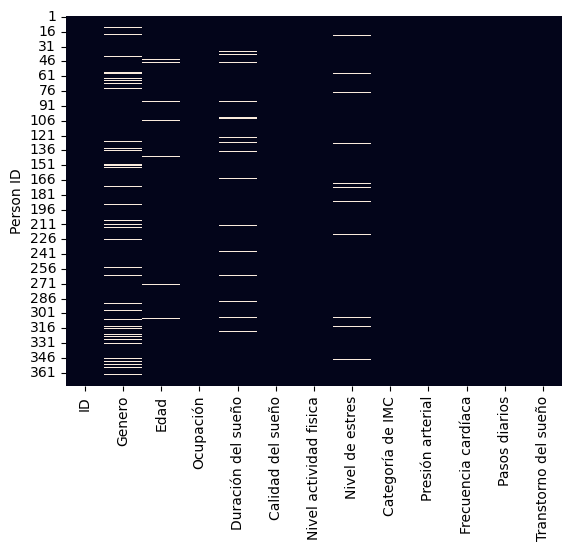

In [18]:
# Ilustrar los valores faltantes
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [38]:
# Crear una neuva categria en la variable "Genero" para rellenar los valores faltantes
nueva_categoria = "No especificado"
df["Genero"] = df["Genero"].fillna(nueva_categoria) 
df.head()

,Unnamed 0,ID,Genero,Edad,Ocupación,Duración del sueño,Calidad del sueño,Nivel actividad fisica,Nivel de estres,Categoría de IMC,Presión arterial,Frecuencia cardíaca,Pasos diarios,Transtorno del sueño
0,0,1,Male,27.0,Software Engineer,6.1,6,42,6.0,Overweight,126/83,77,4200,None
1,1,2,Male,28.0,Doctor,6.2,6,60,8.0,Normal,125/80,75,10000,None
2,2,3,Male,28.0,Doctor,6.2,6,60,8.0,Normal,125/80,75,10000,None
3,3,4,Male,28.0,Sales Representative,5.9,4,30,8.0,Obese,140/90,85,3000,Sleep Apnea
4,4,5,Male,28.0,Sales Representative,5.9,4,30,8.0,Obese,140/90,85,3000,Sleep Apnea


In [39]:
# Proemdiar la edad para rellenar los valores faltantes
df["Edad"].mean()

42.25068119891008

In [40]:
promedio_edad = 42
df["Edad"] = df["Edad"].fillna(promedio_edad)
df.head()


,Unnamed 0,ID,Genero,Edad,Ocupación,Duración del sueño,Calidad del sueño,Nivel actividad fisica,Nivel de estres,Categoría de IMC,Presión arterial,Frecuencia cardíaca,Pasos diarios,Transtorno del sueño
0,0,1,Male,27.0,Software Engineer,6.1,6,42,6.0,Overweight,126/83,77,4200,None
1,1,2,Male,28.0,Doctor,6.2,6,60,8.0,Normal,125/80,75,10000,None
2,2,3,Male,28.0,Doctor,6.2,6,60,8.0,Normal,125/80,75,10000,None
3,3,4,Male,28.0,Sales Representative,5.9,4,30,8.0,Obese,140/90,85,3000,Sleep Apnea
4,4,5,Male,28.0,Sales Representative,5.9,4,30,8.0,Obese,140/90,85,3000,Sleep Apnea


In [41]:
# Sacar la mediana de la variable "Duración del sueño" para rellenar los valores faltantes
df["Duración del sueño"].median()



7.2

In [42]:
df["Duración del sueño"] = df["Duración del sueño"].fillna(7.0)	
df.head()

,Unnamed 0,ID,Genero,Edad,Ocupación,Duración del sueño,Calidad del sueño,Nivel actividad fisica,Nivel de estres,Categoría de IMC,Presión arterial,Frecuencia cardíaca,Pasos diarios,Transtorno del sueño
0,0,1,Male,27.0,Software Engineer,6.1,6,42,6.0,Overweight,126/83,77,4200,None
1,1,2,Male,28.0,Doctor,6.2,6,60,8.0,Normal,125/80,75,10000,None
2,2,3,Male,28.0,Doctor,6.2,6,60,8.0,Normal,125/80,75,10000,None
3,3,4,Male,28.0,Sales Representative,5.9,4,30,8.0,Obese,140/90,85,3000,Sleep Apnea
4,4,5,Male,28.0,Sales Representative,5.9,4,30,8.0,Obese,140/90,85,3000,Sleep Apnea


In [43]:
# Sacar la mediana de la variable "Nivel de estres" para rellenar los valores faltantes
df["Nivel de estres"].median()

5.0

In [44]:
df["Nivel de estres"] = df["Nivel de estres"].fillna(5.0)

In [45]:
# Dataframe sin valores nulos
df_sin_null = pd.read_csv("../data/health_mod.csv")
df_sin_null.head()

,Unnamed: 0,Genero,Edad,Ocupación,Duración del sueño,Calidad del sueño,Nivel actividad fisica,Nivel de estres,Categoría de IMC,Presión arterial,Frecuencia cardíaca,Pasos diarios,Trastorno del sueño
0,0,Male,27.0,Software Engineer,6.1,6,42,6.0,Overweight,126/83,77,4200,None
1,1,Male,28.0,Doctor,6.2,6,60,8.0,Normal Weight,125/80,75,10000,None
2,2,Male,28.0,Doctor,6.2,6,60,8.0,Normal Weight,125/80,75,10000,None
3,3,Male,28.0,Sales Representative,5.9,4,30,8.0,Obese,140/90,85,3000,Sleep Apnea
4,4,Male,28.0,Sales Representative,5.9,4,30,8.0,Obese,140/90,85,3000,Sleep Apnea


In [51]:
# Separar la frecuencia cardiaca en dos columnas /Sistolica y Diastolica
# Conversion a srt para utilizar luego el medtodo split
df_sin_null["Presión arterial"] = df_sin_null["Presión arterial"].astype(str)

# # # # Dividir la columna "Presión arterial" en dos columnas separadas
df_sin_null[["Presión sistólica", "Presión diastólica"]] = df_sin_null["Presión arterial"].str.split("/", expand=True)

# #  Eliminar la columna original "Presión arterial"
df_sin_null.drop("Presión arterial", axis=1, inplace=True)


In [52]:
df_sin_null.describe().round(1)

,Unnamed: 0,Edad,Duración del sueño,Calidad del sueño,Nivel actividad fisica,Nivel de estres,Frecuencia cardíaca,Pasos diarios
count,374.0,374.0,374.0,374.0,374.0,374.0,374.0,374.0
mean,186.5,42.2,7.1,7.3,59.2,5.4,70.2,6816.8
std,108.1,8.6,0.8,1.2,20.8,1.7,4.1,1617.9
min,0.0,27.0,5.8,4.0,30.0,3.0,65.0,3000.0
25%,93.2,36.0,6.5,6.0,45.0,4.0,68.0,5600.0
50%,186.5,42.0,7.2,7.0,60.0,5.0,70.0,7000.0
75%,279.8,50.0,7.8,8.0,75.0,7.0,72.0,8000.0
max,373.0,59.0,8.5,9.0,90.0,8.0,86.0,10000.0


In [53]:
# Convertir las columnas de "Presion sistolica" y "Presion diastolica" a tipo numerico
df_sin_null["Presión sistólica"] = pd.to_numeric(df_sin_null["Presión sistólica"])
df_sin_null["Presión diastólica"] = pd.to_numeric(df_sin_null["Presión diastólica"])

In [54]:
# Corroborar el tipo de datos
df_sin_null.dtypes

Unnamed: 0                  int64
Genero                     object
Edad                      float64
Ocupación                  object
Duración del sueño        float64
Calidad del sueño           int64
Nivel actividad fisica      int64
Nivel de estres           float64
Categoría de IMC           object
Frecuencia cardíaca         int64
Pasos diarios               int64
Trastorno del sueño        object
Presión sistólica           int64
Presión diastólica          int64
dtype: object

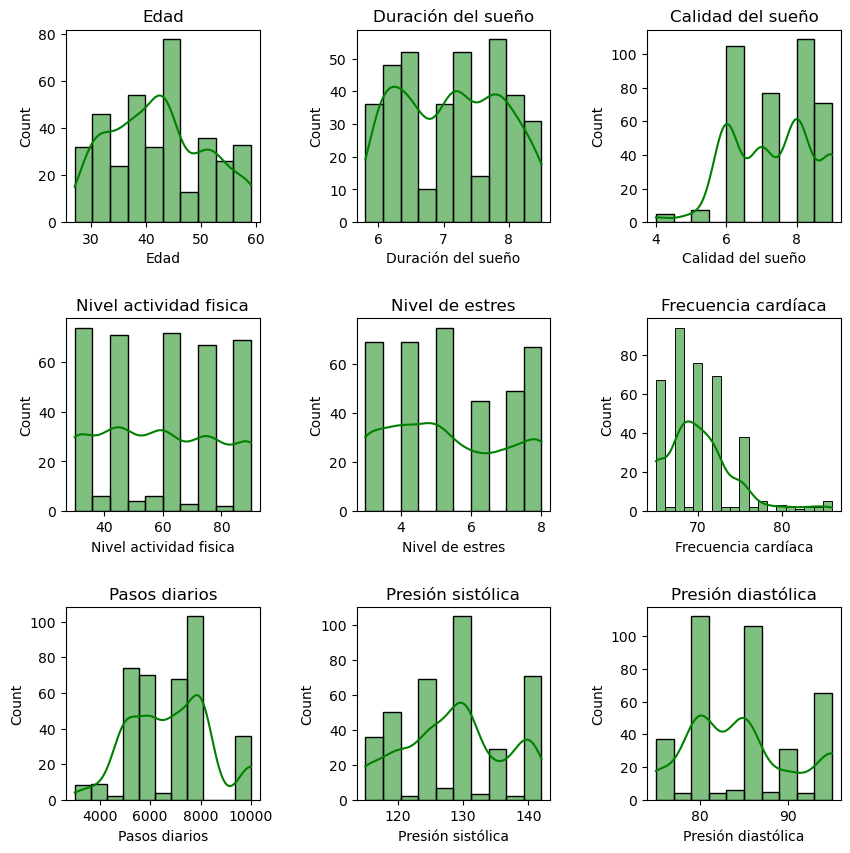

In [26]:
# Graficar 
fig, ax = plt.subplots (3,3, figsize=(10,10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

variables_numericas = ["Edad", "Duración del sueño", "Calidad del sueño", "Nivel actividad fisica", "Nivel de estres", "Frecuencia cardíaca", "Pasos diarios", "Presión sistólica", "Presión diastólica"]

for i, variable in enumerate(variables_numericas):
    sns.histplot(df_sin_null[variable], ax=ax[i//3, i%3], color="green", kde=True)
    ax[i//3, i%3].set_title(variable)

plt.show()

In [27]:
# Se observan don categorias iguales pero con diferente nombre (Salesperson y Sales Representative)
df_sin_null["Ocupación"].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Ocupación, dtype: int64

In [31]:
# # Unificar en la variable Ocupacion las categorias "Sales person" y "Sales Representative"

df_sin_null.loc[df_sin_null["Ocupación"] == "Salesperson", "Ocupación"] = "Sales Representative"

# # Unificar la categoria Normal con Normal Weight de la variable "Categoría de IMC"

df_sin_null.loc[df_sin_null["Categoría de IMC"] == "Normal", "Categoría de IMC"] = "Normal Weight"

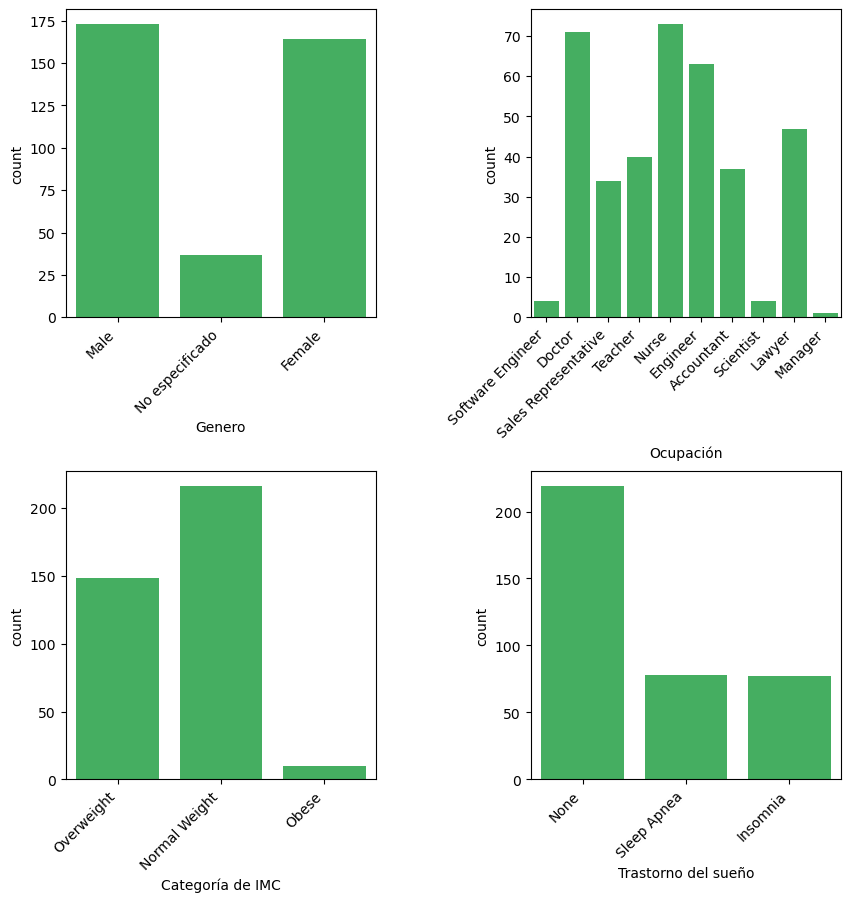

In [32]:
# Graficar variables categoricas 
fig, ax = plt.subplots (2,2, figsize=(10,10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

variables_categoricas =["Genero", "Ocupación", "Categoría de IMC", "Trastorno del sueño"]

for i, variable in enumerate(variables_categoricas):
    sns.countplot(x=variable, data=df_sin_null, ax=ax[i//2, i%2], color="#34bf59")
    plt.xticks(rotation=45)

for ax in ax.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')

plt.show()




In [57]:

# Guardar el dataset con los cambios realizados
df_sin_null.to_csv("../data/datos_limpios.csv", index=False)


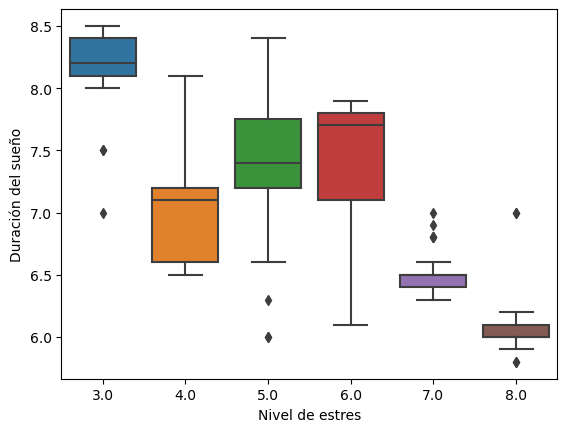

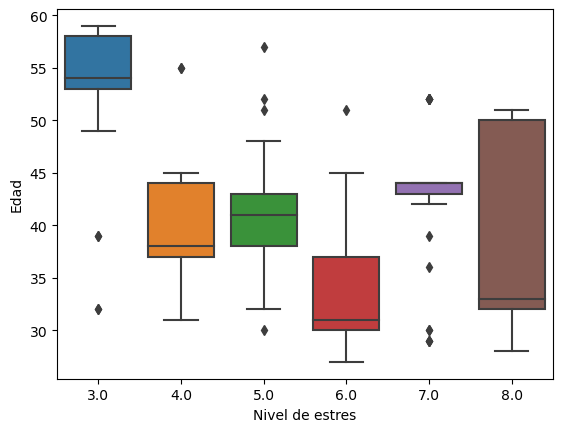

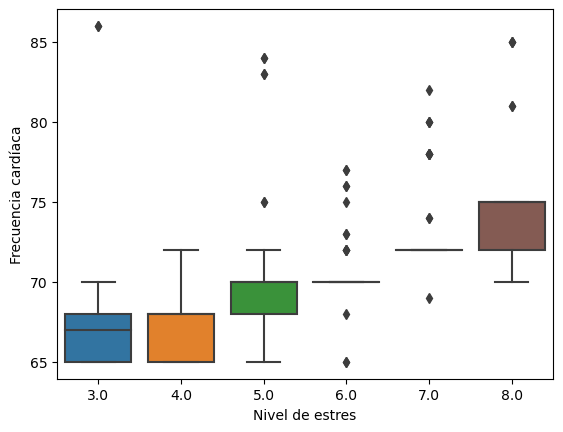

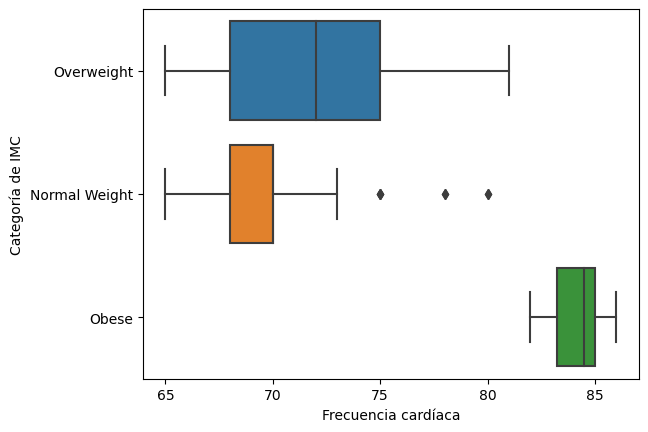

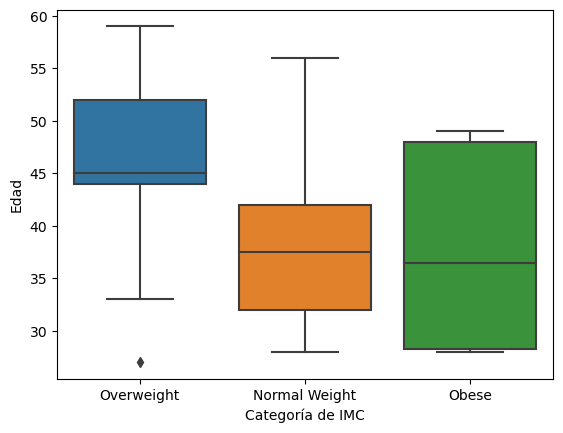

In [71]:
sns.boxplot(x="Nivel de estres", y="Duración del sueño", data=datos_limpios)
plt.show()

sns.boxplot(x="Nivel de estres", y="Edad", data=datos_limpios)
plt.show()

sns.boxplot(x="Nivel de estres", y="Frecuencia cardíaca", data=datos_limpios)
plt.show()

sns.boxplot(x="Frecuencia cardíaca", y="Categoría de IMC", data=datos_limpios)
plt.show()

sns.boxplot(x="Categoría de IMC", y="Edad", data=datos_limpios)
plt.show()

In [61]:
datos_limpios = pd.read_csv("../data/datos_limpios.csv", index_col=0)
datos_limpios.head()

,Genero,Edad,Ocupación,Duración del sueño,Calidad del sueño,Nivel actividad fisica,Nivel de estres,Categoría de IMC,Frecuencia cardíaca,Pasos diarios,Trastorno del sueño,Presión sistólica,Presión diastólica
Unnamed: 0,,,,,,,,,,,,,
0,Male,27.0,Software Engineer,6.1,6,42,6.0,Overweight,77,4200,None,126,83
1,Male,28.0,Doctor,6.2,6,60,8.0,Normal Weight,75,10000,None,125,80
2,Male,28.0,Doctor,6.2,6,60,8.0,Normal Weight,75,10000,None,125,80
3,Male,28.0,Sales Representative,5.9,4,30,8.0,Obese,85,3000,Sleep Apnea,140,90
4,Male,28.0,Sales Representative,5.9,4,30,8.0,Obese,85,3000,Sleep Apnea,140,90


C:\Users\Usuario\AppData\Local\Temp\ipykernel_11912\3068609878.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(datos_limpios.corr(), annot=True, cmap="YlGnBu", vmin=-1, vmax=1)


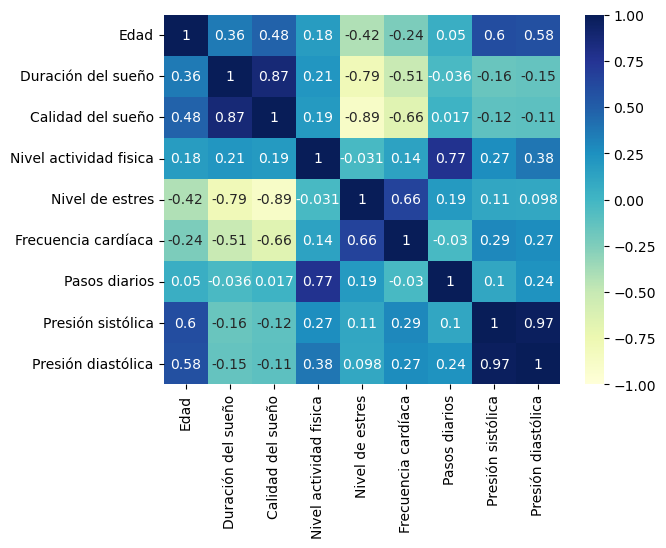

In [62]:
# Graficar la correlación entre las variables
sns.heatmap(datos_limpios.corr(), annot=True, cmap="YlGnBu", vmin=-1, vmax=1)
plt.show()



# Correlación entre variables de interes 

## Calidad del sueño vs Nievel de estres (-0,90) Correlación negativa
## Presíon Sistolica vs Presion Diastólica (0,97) Correlación positiva
## Duración del sueño vs Nivel de estres (-0,80) Correlacion negativa
## Duración del sueño vs calidad del sueño (0,87) Correlación positiva
## Frecuencia cardiaca vs nivel de estres (0,66) Correlacion positiva

In [ ]:
# Normalizacion de datos 
from sklearn.preprocessing import MinMaxScaler


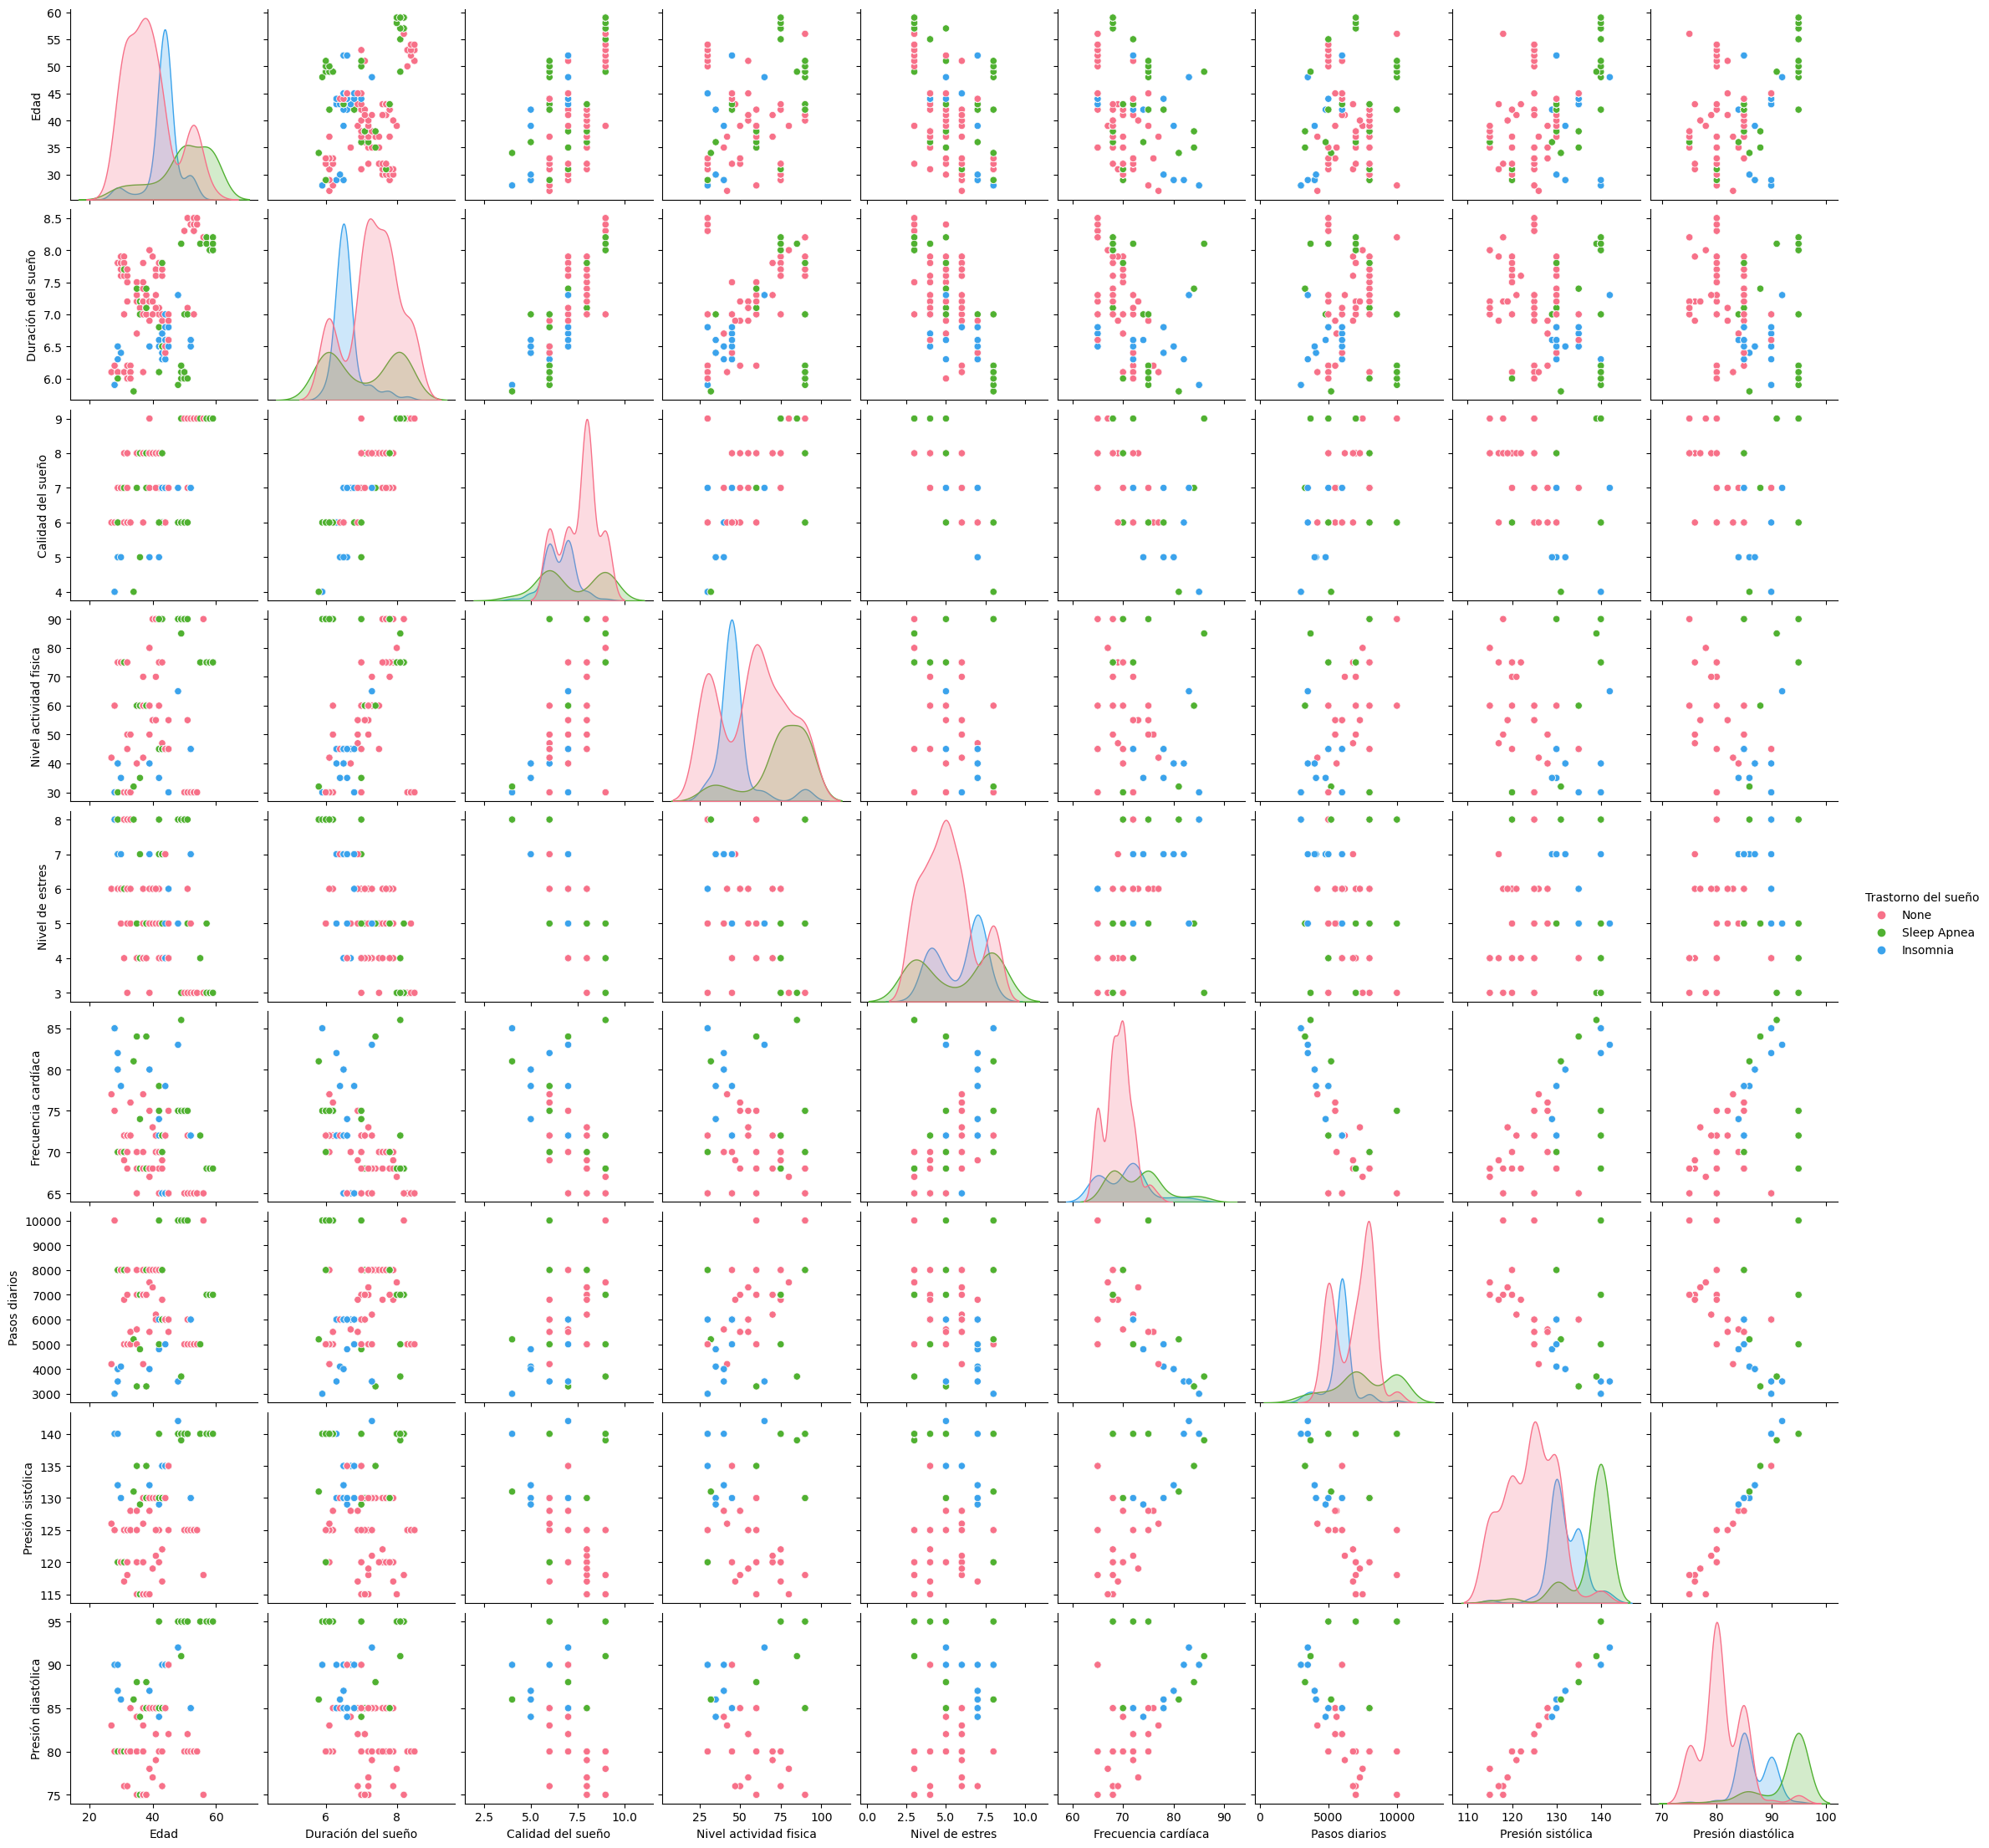

In [65]:
# Graficar la correlación entre las variables

sns.pairplot(datos_limpios, hue="Trastorno del sueño", palette="husl")
plt.show()

<AxesSubplot: xlabel='Nivel de estres', ylabel='Duración del sueño'>

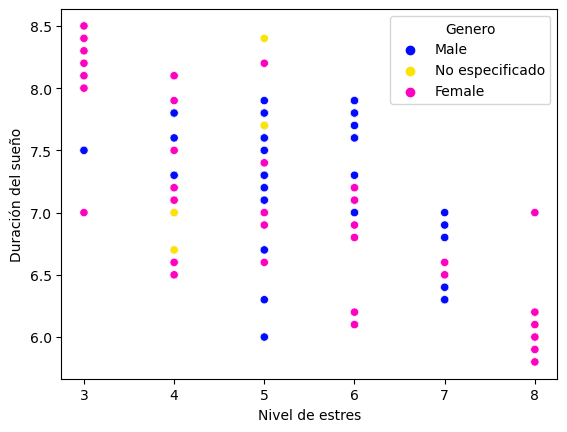

In [75]:
# Graficar la correlación entre las variables, nivel de estres y calidad del sueño
sns.scatterplot(x="Nivel de estres", y="Duración del sueño", data=datos_limpios, hue="Genero", palette=[ "#030bfc","#fce303","#fc03c2"])

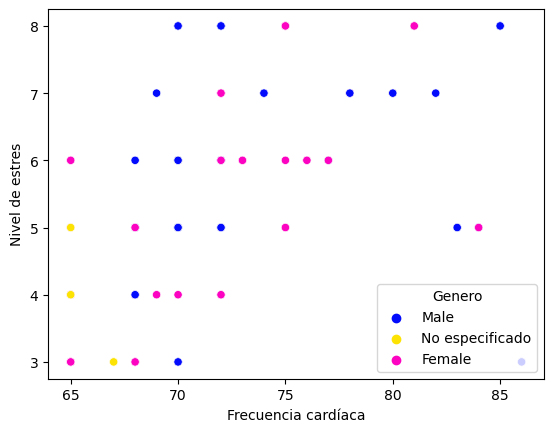

In [76]:
# Graficar la frecuencia cardiaca vs el nivel de estres
sns.scatterplot(x="Frecuencia cardíaca", y="Nivel de estres", data=datos_limpios, hue="Genero", palette=[ "#030bfc","#fce303","#fc03c2"])
plt.show()

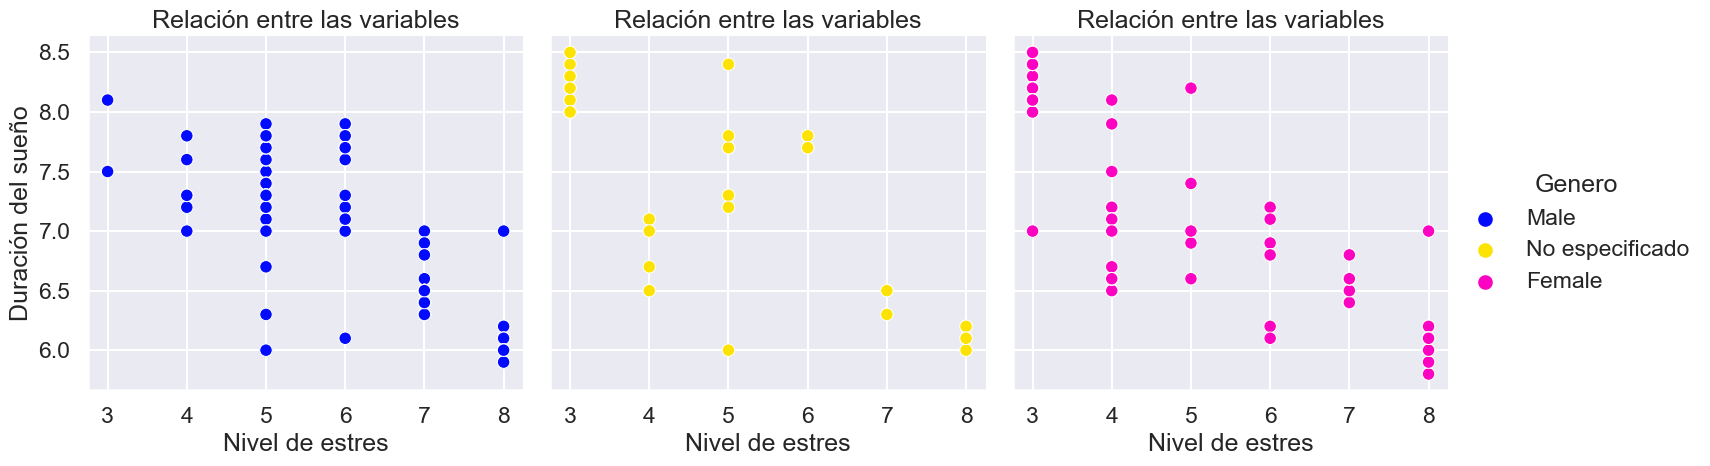

In [88]:
sns.set_theme(style="darkgrid", context="talk")
relacional = sns.relplot(data=datos_limpios, x="Nivel de estres", y="Duración del sueño", hue="Genero", palette=[ "#030bfc","#fce303","#fc03c2"], col="Genero")
relacional.set(title="Relación entre las variables", xlabel="Nivel de estres", ylabel="Duración del sueño")
relacional.set_ylabels("Duración del sueño")
relacional.set_xlabels("Nivel de estres")
plt.show()

In [103]:
# Escalar de variables numericas
from sklearn.preprocessing import StandardScaler



# Seleccionar las variables numericas
var_numericas = ["Edad", "Duración del sueño", "Calidad del sueño", "Nivel actividad fisica", "Nivel de estres", "Frecuencia cardíaca", "Pasos diarios", "Presión sistólica", "Presión diastólica"]

# Crear el objeto para escalar los datos
scaler = StandardScaler()

# Escalar los datos
datos_escalados = scaler.fit_transform(datos_limpios[var_numericas])

# Convertir el array a un dataframe
datos_escalados = pd.DataFrame(datos_escalados, columns=var_numericas)

datos_escalados.head()







,Edad,Duración del sueño,Calidad del sueño,Nivel actividad fisica,Nivel de estres,Frecuencia cardíaca,Pasos diarios,Presión sistólica,Presión diastólica
0,-1.775541,-1.315690,-1.098280,-0.825418,0.363150,1.654719,-1.619584,-0.330002,-0.268102
1,-1.659082,-1.187846,-1.098280,0.039844,1.509294,1.170474,1.970077,-0.459239,-0.755640
2,-1.659082,-1.187846,-1.098280,0.039844,1.509294,1.170474,1.970077,-0.459239,-0.755640
3,-1.659082,-1.571376,-2.771424,-1.402260,1.509294,3.591698,-2.362273,1.479309,0.869486
4,-1.659082,-1.571376,-2.771424,-1.402260,1.509294,3.591698,-2.362273,1.479309,0.869486


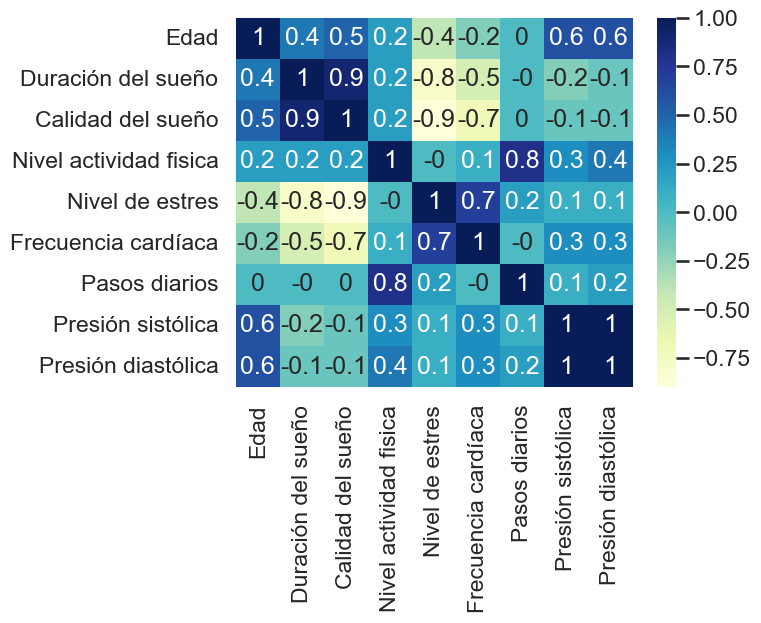

In [110]:
# Visualizar la correlación entre las variables
sns.set_theme(style="darkgrid", context="talk")
sns.heatmap(datos_escalados.corr().round(1), annot=True, cmap="YlGnBu") 
plt.show()

In [96]:
# Dumificacion de datos
# Seleccion de columnas a dumificar, duevo dataframe
df_dum = datos_limpios[["Genero", "Ocupación", "Calidad del sueño", "Categoría de IMC", "Trastorno del sueño"]]
df_dum.head()



,Genero,Ocupación,Calidad del sueño,Categoría de IMC,Trastorno del sueño
Unnamed: 0,,,,,
0,Male,Software Engineer,0.4,Overweight,None
1,Male,Doctor,0.4,Normal Weight,None
2,Male,Doctor,0.4,Normal Weight,None
3,Male,Sales Representative,0.0,Obese,Sleep Apnea
4,Male,Sales Representative,0.0,Obese,Sleep Apnea


In [97]:
df_dum.shape

(374, 5)

In [98]:
dummy = pd.get_dummies(df_dum, columns=["Genero", "Ocupación", "Calidad del sueño", "Categoría de IMC", "Trastorno del sueño"], prefix=["sexo", "ocupacion", "calidad_sueño", "imc", "trastorno_sueño"])
dummy.head()

,sexo_Female,sexo_Male,sexo_No especificado,ocupacion_Accountant,ocupacion_Doctor,ocupacion_Engineer,ocupacion_Lawyer,ocupacion_Manager,ocupacion_Nurse,ocupacion_Sales Representative,...,calidad_sueño_0.40000000000000013,calidad_sueño_0.6000000000000001,calidad_sueño_0.8,calidad_sueño_1.0,imc_Normal Weight,imc_Obese,imc_Overweight,trastorno_sueño_Insomnia,trastorno_sueño_None,trastorno_sueño_Sleep Apnea
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
1,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [100]:
# Concatenar los dataframes y eliminar las columnas originales que se dumificaron
df_concat = datos_limpios.drop(["Genero", "Ocupación", "Calidad del sueño", "Categoría de IMC", "Trastorno del sueño"], axis=1)
df_concat = pd.concat([df_concat, dummy], axis=1)
df_concat.head()


,Edad,Duración del sueño,Nivel actividad fisica,Nivel de estres,Frecuencia cardíaca,Pasos diarios,Presión sistólica,Presión diastólica,sexo_Female,sexo_Male,...,calidad_sueño_0.40000000000000013,calidad_sueño_0.6000000000000001,calidad_sueño_0.8,calidad_sueño_1.0,imc_Normal Weight,imc_Obese,imc_Overweight,trastorno_sueño_Insomnia,trastorno_sueño_None,trastorno_sueño_Sleep Apnea
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,0.00000,0.111111,0.2,0.6,0.571429,0.171429,0.407407,0.40,0,1,...,1,0,0,0,0,0,1,0,1,0
1,0.03125,0.148148,0.5,1.0,0.476190,1.000000,0.370370,0.25,0,1,...,1,0,0,0,1,0,0,0,1,0
2,0.03125,0.148148,0.5,1.0,0.476190,1.000000,0.370370,0.25,0,1,...,1,0,0,0,1,0,0,0,1,0
3,0.03125,0.037037,0.0,1.0,0.952381,0.000000,0.925926,0.75,0,1,...,0,0,0,0,0,1,0,0,0,1
4,0.03125,0.037037,0.0,1.0,0.952381,0.000000,0.925926,0.75,0,1,...,0,0,0,0,0,1,0,0,0,1


## Con la dummificación aumenta la dimensionalidad del dataframe

## Analisis de componentes principales 👩‍💻👩‍💻

Método estadístico que permite reducir la dimensionalidad manteniendo la información más importante

## Pasos

1. **Estandarización o escalamiento**
La estandarización es una forma de escalonamiento en el cual los valores están centrados alrededor del valor medio y tiene una unidad de desviación típica.
Una vez estandarizados los datos, cada característica estará en la misma escala.

2. **Calculo de la matriz de covarianza**
La matriz de covarianza es una matriz cuadrada que muestra la relación entre dos características aleatorias, evitando la información duplicada.
Necesitamos tener en cuenta el signo de la covarianza. Si es positivo, significa que ambas variables son correlacionadas; si es negativo, son inversamente correlacionadas.

3. **Calcular la Descomposición Propia de la Matriz de Covarianza**
En esta fase, procederemos a calcular los valores y vectores propios de la matriz de covarianza del paso anterior. De esta forma, obtendremos el Componente Principal.
Los componentes principales, son variables formadas como combinaciones lineales de las características iniciales. Su objetivo principal es guardar la mayor cantidad de datos no correlacionados en el primer componente y dejar el resto al siguiente, el cual tendrá la información restante, así consecutivamente hasta que todos los datos estén guardados.
Este procedimiento ayudará en la reducción de dimensionalidad mientras se retiene la mayor cantidad de información posible y descarta los componentes con menor información.

In [114]:
# Analisis de componentes principales
from sklearn.decomposition import PCA

# Matriz de covarianza
cov_mat = np.cov(datos_escalados.T)



In [116]:
# Calcular los valores y vectores propios

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print("\nValores propios \n%s" % eigen_vals)
print("\nVectores propios \n%s" % eigen_vecs)


Valores propios 
[3.49186472 2.78361525 1.55365401 0.60431456 0.27141459 0.15550017
 0.08264149 0.06722219 0.01390171]

Vectores propios 
[[-0.25235992 -0.40927247 -0.29553028  0.1646543   0.74722102 -0.19546547
  -0.19521636 -0.14035262 -0.00265433]
 [-0.47862708 -0.02048219  0.07237807 -0.42563158  0.07002152  0.70377581
  -0.03777581 -0.28565665 -0.0294217 ]
 [-0.51707752 -0.05052477  0.04656604 -0.11286605  0.05131909 -0.11021774
   0.39311817  0.7237158   0.14860314]
 [-0.04922246 -0.37952666  0.56722582 -0.2870743  -0.12389856 -0.23292403
  -0.59553295  0.15749458 -0.01764575]
 [ 0.49993116  0.00150572  0.10805214  0.10820963  0.38159372  0.54991828
  -0.16184067  0.48442493  0.13340981]
 [ 0.41112112 -0.11800389 -0.02881721 -0.74504709  0.25489578 -0.21114829
   0.3797832  -0.08565199  0.00138261]
 [ 0.02860306 -0.28135224  0.65722273  0.3546887   0.14393155  0.06853864
   0.51472623 -0.24167279 -0.11625113]
 [ 0.0977031  -0.53008969 -0.31155927  0.02100485 -0.28183652  0.17995

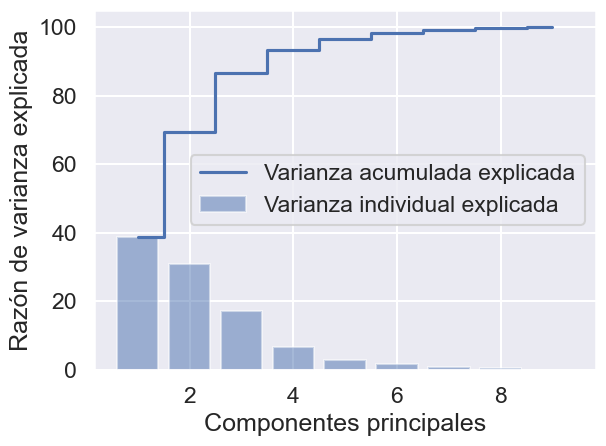

In [119]:
# Ordenar los valores y vectores propios de mayor a menor
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

# Graficar cada componente principal

tot = sum(eigen_vals)

var_exp = [(i / tot)*100 for i in sorted(eigen_vals, reverse=True)]





In [142]:
# Varianza acumulada
cum_var_exp = pca.explained_variance_ratio_.cumsum()
cum_var_exp

array([0.38694758, 0.69541118])

In [121]:
# Proyeccion de los datos en el nuevo espacio vectorial

pca = PCA(n_components=2)

datos_pca = pca.fit_transform(datos_escalados)

# Convertir el array a un dataframe

datos_pca = pd.DataFrame(datos_pca, columns=["PC1", "PC2"])

datos_pca.head()


,PC1,PC2
0,2.445434,-1.707885
1,2.732283,-0.718692
2,2.732283,-0.718692
3,5.059347,-0.357122
4,5.059347,-0.357122


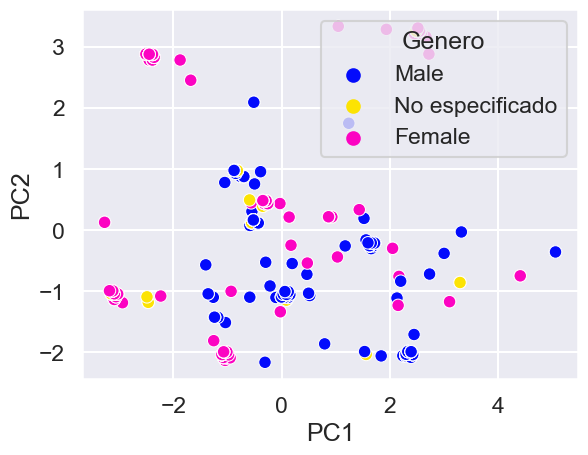

In [128]:
# Graficar los datos en el nuevo espacio vectorial

sns.set_theme(style="darkgrid", context="talk")
sns.scatterplot(x="PC1", y="PC2", data=datos_pca, hue=datos_limpios["Genero"], palette=[ "#030bfc","#fce303","#fc03c2"])


plt.show()

In [ ]:
# Biplot PCA
